In [41]:
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import numpy as np
import imutils
import cv2
import numpy as np
import argparse
#import time
import matplotlib.pyplot as plt
#import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras_applications import resnet50
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
from keras.utils import to_categorical
from model import SSD300v2
from sklearn.preprocessing import LabelEncoder

In [42]:
# def crop(img):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     th, threshed = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
#     morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)
#     cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
#     cnt = sorted(cnts, key=cv2.contourArea)[-1]
#     x,y,w,h = cv2.boundingRect(cnt)
#     dst = img[y:y+h, x:x+w]
#     return dst

In [43]:
# def func(image):
    
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     gray = cv2.GaussianBlur(gray, (5, 5), 0)

#     thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
#     thresh = cv2.erode(thresh, None, iterations=2)
#     thresh = cv2.dilate(thresh, None, iterations=2)

#     cnts,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

#     areas = [cv2.contourArea(c) for c in cnts]
#     max_index = np.argmax(areas)
#     c=cnts[max_index]

#     M=cv2.moments(c)

#     extTop=int(M['m10']/M['m00'])
#     extBot=int(M['m01']/M['m00'])
#     ext=(extTop,extBot)

 

#     cv2.waitKey(0)
#     return extBot
   

In [44]:
# folder = 'E:\\source\\practice\\hackfest\\detect_model\\detect_model\\data'
# y = []
# images = []
# for filename in os.listdir(folder):
#     a = list(filename.split("."))
#     y.append(int(a[0]))
#     img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_COLOR)
#     if img is not None:
#         img = cv2.resize(img, (300, 300))
#         images.append(img)

In [45]:
folder = 'E:\\detect_model\\data1\\'
subfolders = [f.path for f in os.scandir(folder) if f.is_dir() ] 

In [46]:
images = []
objects = ['hand', 'bottle', 'disk','snacks']
i = 0
y = []
for folder in subfolders:
    
    for filename in os.listdir(folder):
        a = list(filename.split("."))
        #y.append(int(a[0]))
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_COLOR)
        if img is not None:
            img = cv2.resize(img, (10, 10))
            images.append(img)
            y.append(i)
            
    i += 1

In [47]:
y_ = y

In [48]:
k = to_categorical(y_)

In [50]:
k

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [51]:
y = to_categorical(y)

In [ ]:
k.shape

In [ ]:
plt.imshow(images[100])

In [12]:
# images[0].shape

In [13]:
# model_ = SSD300v2(images[0].shape)
# model_.summary()
# model_.compile(optimizer='Adam', loss = 'categorical_crossentropy')

In [14]:
# model_.fit(x_train, y_train)

In [13]:
im = cv2.resize(images[0], (300, 300))

In [14]:
im = im.reshape(1, 300, 300, 3)

In [18]:
y.shape

(2287, 4)

In [52]:

#y = to_categorical(y)
#y = np.array(y)
images = np.array(images)
x_train, x_test, y_train, y_test = train_test_split(images, k, test_size=0.2, random_state=42)

In [53]:
x_train = x_train.reshape(x_train.shape[0], 10,10, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 10, 10, 3).astype('float32')
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test /255

In [54]:
x_train.shape

(1829, 10, 10, 3)

In [55]:
def larger_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(10, 10, 3), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = larger_model()

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 6, 6, 32)          2432      
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 32)          9248      
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
__________

In [57]:

    eas = keras.callbacks.EarlyStopping(monitor='acc', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
    tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

    filepath="weights-improvement-latest-age-{epoch:02d}-{val_acc:.2f}.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint, tbCallBack, eas]
    model.fit(x_train, y_train, validation_data=(x_test, y_test),callbacks= callbacks_list, epochs=32, batch_size=32)
    model.save('total1.h5')


Train on 1829 samples, validate on 458 samples
Epoch 1/32
1829/1829 [==============================] - 1s 414us/step - loss: 0.9700 - acc: 0.6020 - val_loss: 0.3602 - val_acc: 0.9367

Epoch 00001: acc improved from -inf to 0.60197, saving model to weights-improvement-latest-age-01-0.94.hdf5
Epoch 2/32
1829/1829 [==============================] - 0s 239us/step - loss: 0.2341 - acc: 0.9317 - val_loss: 0.1457 - val_acc: 0.9520

Epoch 00002: acc improved from 0.60197 to 0.93166, saving model to weights-improvement-latest-age-02-0.95.hdf5
Epoch 3/32
1829/1829 [==============================] - 0s 260us/step - loss: 0.1746 - acc: 0.9382 - val_loss: 0.0325 - val_acc: 0.9934

Epoch 00003: acc improved from 0.93166 to 0.93822, saving model to weights-improvement-latest-age-03-0.99.hdf5
Epoch 4/32
1829/1829 [==============================] - 0s 244us/step - loss: 0.0514 - acc: 0.9847 - val_loss: 0.0223 - val_acc: 0.9978

Epoch 00004: acc improved from 0.93822 to 0.98469, saving model to weights-

In [58]:
model.evaluate(x_test, y_test)

458/458 [==============================] - 0s 624us/step


[0.0312004669784979, 0.9868995627982127]

In [59]:
model.save('total1.h5')

In [9]:
f = open('gy.txt', 'r')

In [10]:
x = f.read()

In [11]:
x

'{"GlhoxYgeZ7pFrSCGjMaP":"box","N4tDJgWSXGpyKfowqgZz":"blue_bottle","RkPATLS2uy2eSHNNjsiP":"notebook","TU8yf0fRdSS8fnBkLlCr":"cocacola_can","rYeFRV3sXrjyfdNeaSUD":"red_bottle","tS9KRyw5wnnlinxrwK2g":"box_cap"}'

In [12]:
import ast

In [13]:
x = ast.literal_eval(x)

In [14]:
x

{'GlhoxYgeZ7pFrSCGjMaP': 'box',
 'N4tDJgWSXGpyKfowqgZz': 'blue_bottle',
 'RkPATLS2uy2eSHNNjsiP': 'notebook',
 'TU8yf0fRdSS8fnBkLlCr': 'cocacola_can',
 'rYeFRV3sXrjyfdNeaSUD': 'red_bottle',
 'tS9KRyw5wnnlinxrwK2g': 'box_cap'}

In [15]:
inv_map = {v: k for k, v in x.items()}

In [16]:
inv_map

{'box': 'GlhoxYgeZ7pFrSCGjMaP',
 'blue_bottle': 'N4tDJgWSXGpyKfowqgZz',
 'notebook': 'RkPATLS2uy2eSHNNjsiP',
 'cocacola_can': 'TU8yf0fRdSS8fnBkLlCr',
 'red_bottle': 'rYeFRV3sXrjyfdNeaSUD',
 'box_cap': 'tS9KRyw5wnnlinxrwK2g'}

In [14]:
y.shape

(4284, 6)

In [15]:
images.shape

(4284, 300, 300, 3)

In [20]:
from keras.models import load_model

In [21]:
model = load_model("total1.h5")

In [21]:
model.predict(im)

array([[0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total para

In [36]:
k = 526

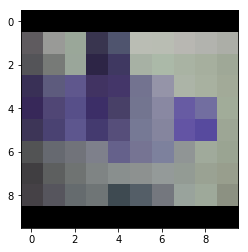

In [37]:
plt.imshow(images[k])

In [38]:
im = cv2.resize(images[k], (10, 10))
im = im.reshape(1, 10, 10, 3)

In [39]:
P = model.predict(im)

In [40]:
print(np.argmax(P))
print(y[k])

1
1


1
